In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 데이터 불러오기
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-01 05:03:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   224MB/s    in 0.3s    

2022-08-01 05:03:15 (224 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip -qq /content/cats_and_dogs_filtered.zip

In [27]:
X = []

# cat : 0, dog : 1
y = []

In [28]:
import os

cat_list = os.listdir('/content/cats_and_dogs_filtered/train/cats')
len(cat_list)

1000

In [29]:
from PIL import Image
for fn in cat_list:
  im = Image.open('/content/cats_and_dogs_filtered/train/cats/' + fn)
  new_image = im.resize((128,128))
  img = np.array(new_image)
  X.append(img)
  y.append(0)


In [30]:
dog_list = os.listdir('/content/cats_and_dogs_filtered/train/dogs')
len(dog_list)

1000

In [31]:
from PIL import Image
for fn in dog_list:
  im = Image.open('/content/cats_and_dogs_filtered/train/dogs/' + fn)
  new_image = im.resize((128,128))
  img = np.array(new_image)
  X.append(img)
  y.append(1)

In [32]:
# X, y

X = np.array(X)
y = np.array(y)

In [33]:
X.shape, y.shape

((2000, 128, 128, 3), (2000,))

In [34]:
# minmax_scaling 후 train, test, val 나누기
X = X/255

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [14]:
# 모델 만들기
def build_model():


  model = keras.Sequential([
      layers.Conv2D(16, (3,3), input_shape=(128, 128, 3), activation = 'relu'),
      layers.Conv2D(32, (3,3)),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.2),

      layers.Flatten(),
      layers.Dense(32, activation = 'relu'),
      layers.Dense(16, activation = 'relu'),
      layers.Dense(1, activation = 'sigmoid')

  ])
  return model

In [15]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0

In [16]:
# 모델 컴파일
adam = keras.optimizers.Adam(learning_rate = 0.0002)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [17]:
# 모델 학습

EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/30
25/25 [==============================] - 13s 59ms/step - loss: 1.6601 - acc: 0.5412 - val_loss: 0.7571 - val_acc: 0.4700
Epoch 2/30
25/25 [==============================] - 1s 43ms/step - loss: 0.6058 - acc: 0.6869 - val_loss: 0.7130 - val_acc: 0.4750
Epoch 3/30
25/25 [==============================] - 1s 43ms/step - loss: 0.5515 - acc: 0.7200 - val_loss: 0.6981 - val_acc: 0.5100
Epoch 4/30
25/25 [==============================] - 1s 43ms/step - loss: 0.4620 - acc: 0.7713 - val_loss: 0.6979 - val_acc: 0.4950
Epoch 5/30
25/25 [==============================] - 1s 42ms/step - loss: 0.3505 - acc: 0.8431 - val_loss: 0.7121 - val_acc: 0.5050
Epoch 6/30
25/25 [==============================] - 1s 42ms/step - loss: 0.2488 - acc: 0.9106 - val_loss: 0.7032 - val_acc: 0.5225
Epoch 7/30
25/25 [==============================] - 1s 42ms/step - loss: 0.2133 - acc: 0.9225 - val_loss: 0.6997 - val_acc: 0.5225
Epoch 8/30
25/25 [==============================] - 1s 42ms/step - loss: 0.1553 - 

In [18]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

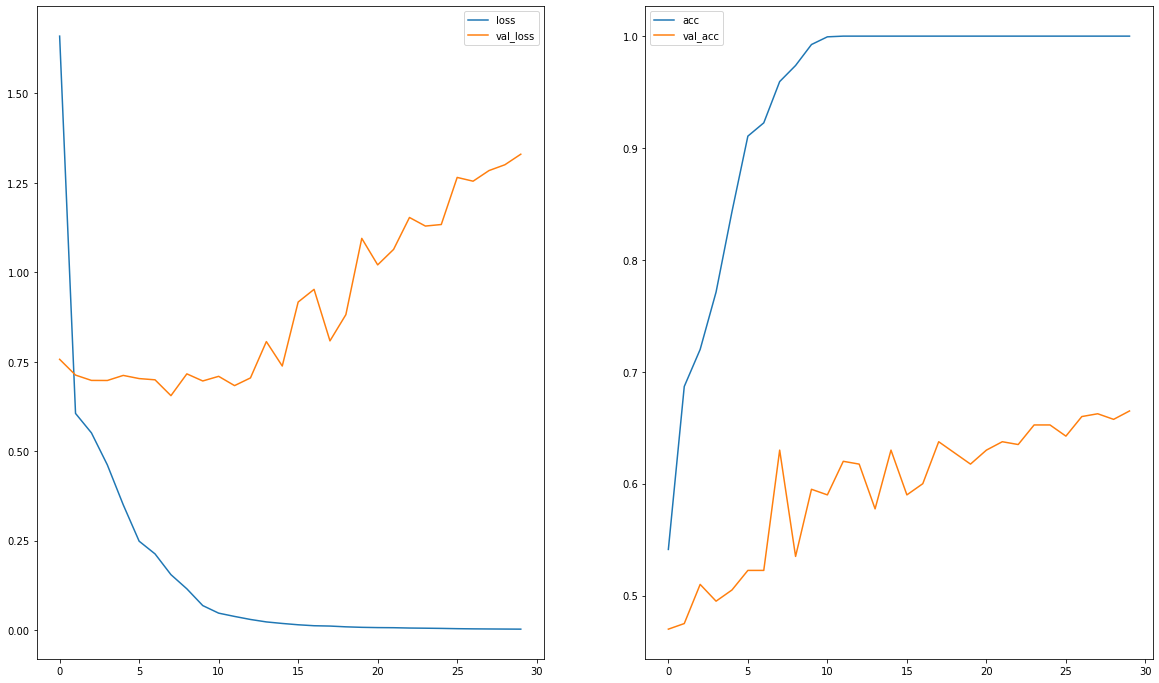

In [19]:
plot_history(history)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([[9.24393535e-02],
       [8.81739438e-01],
       [8.60555768e-01],
       [5.84954917e-01],
       [1.88460514e-01],
       [4.06920284e-01],
       [1.34926051e-01],
       [3.23535874e-02],
       [8.99309993e-01],
       [7.46635616e-01],
       [1.37997707e-02],
       [2.04157823e-05],
       [8.99377882e-01],
       [9.95615959e-01],
       [1.55202509e-03],
       [4.14200564e-04],
       [4.13616486e-02],
       [9.99998093e-01],
       [1.35168259e-03],
       [3.19630199e-04],
       [6.20972551e-02],
       [9.96989608e-01],
       [9.94626820e-01],
       [4.10909997e-03],
       [9.99705851e-01],
       [2.15045991e-03],
       [1.87610731e-01],
       [5.67564787e-03],
       [9.97208059e-01],
       [1.03976458e-01],
       [2.54586630e-04],
       [1.48680493e-01],
       [4.36150312e-01],
       [6.61600977e-02],
       [2.43760154e-01],
       [9.92133081e-01],
       [1.92513806e-04],
       [9.06540513e-01],
       [6.84673965e-01],
       [2.96906799e-01],


In [21]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.665

# 전이학습

In [37]:
# ImageNet으로 학습된 VGG16 모델 가져와서 이진 분류

# include_top = False --> 뉴럴 네트워크 부분 안가져옴(변화시켜야 하므로)

In [38]:
vgg16 = tf.keras.applications.VGG16(
    weights= 'imagenet',
    include_top = False,
    input_shape=(128,128,3),
)

vgg16.trainable=False

model = keras.Sequential([
        vgg16,
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(1,activation='sigmoid')
])
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [40]:
Epochs = 20
batch_size=128
history = model.fit(X_train,y_train,epochs=Epochs,batch_size=batch_size,validation_data=[X_val,y_val])

Epoch 1/20
13/13 [==============================] - 4s 267ms/step - loss: 0.9456 - acc: 0.5725 - val_loss: 0.6195 - val_acc: 0.6300
Epoch 2/20
13/13 [==============================] - 3s 250ms/step - loss: 0.5385 - acc: 0.7431 - val_loss: 0.4595 - val_acc: 0.8275
Epoch 3/20
13/13 [==============================] - 3s 252ms/step - loss: 0.4120 - acc: 0.8338 - val_loss: 0.4147 - val_acc: 0.8150
Epoch 4/20
13/13 [==============================] - 3s 255ms/step - loss: 0.3486 - acc: 0.8687 - val_loss: 0.3581 - val_acc: 0.8650
Epoch 5/20
13/13 [==============================] - 3s 259ms/step - loss: 0.3081 - acc: 0.8888 - val_loss: 0.3343 - val_acc: 0.8625
Epoch 6/20
13/13 [==============================] - 3s 258ms/step - loss: 0.2811 - acc: 0.9019 - val_loss: 0.3162 - val_acc: 0.8725
Epoch 7/20
13/13 [==============================] - 3s 263ms/step - loss: 0.2516 - acc: 0.9100 - val_loss: 0.3022 - val_acc: 0.8700
Epoch 8/20
13/13 [==============================] - 3s 267ms/step - loss: 0.

In [41]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

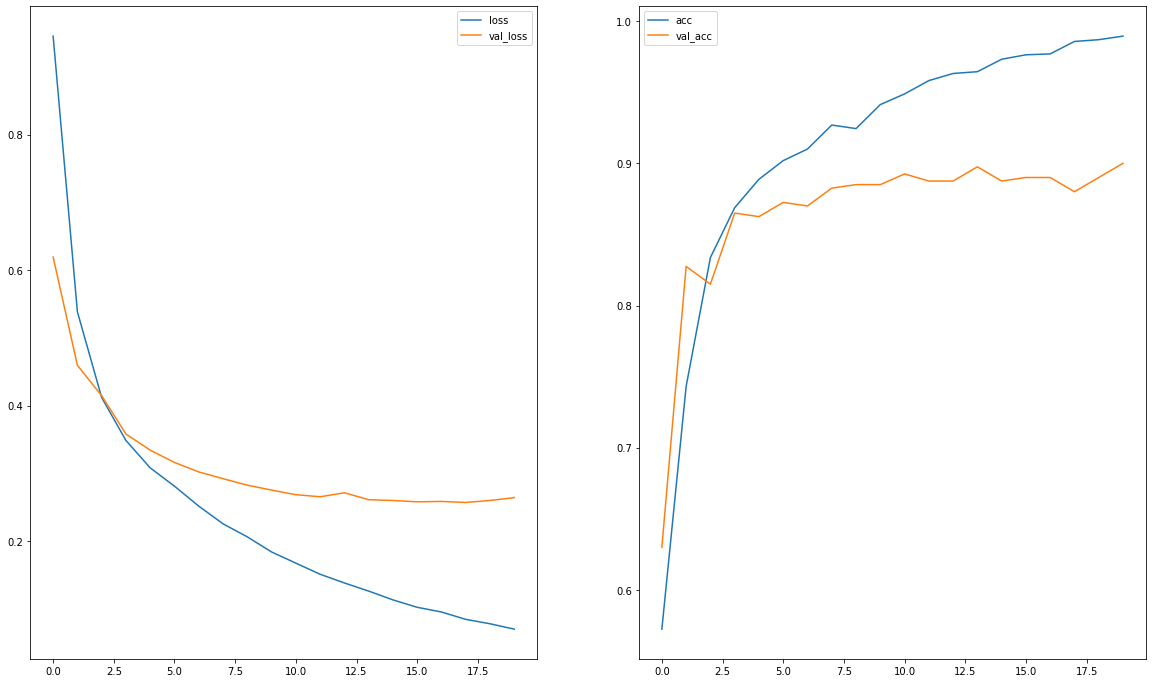

In [42]:
plot_history(history)

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9